# Trans-Atlantic Slave Trade EDA

In study, we will uncover some of the numbers behind the Trans-atlantic slave trade (TAST), also known as the middle passage, that brought African slaves to the Americas.  The middle passage is reported to have forcibly migrated over 10 million Africans to the Americas over a roughly 3 century time span.  Many aspects of the TAST is little known by most people, such as the countries that constituted this network of slave ships, the regions from which the slaves were taken, and the number of slaves captured from Africa.

This last number is especially important since the number of slaves taken from Africa can impact other estimates that result from this.  For example, when estimating the population of Africa in a given decade, demographers will use population growth models and more recent census data.  For example, there are roughly X number of people in Africa and such populations tend to grow at rate M.  Then if we want to calculate the population one century ahead then we just apply a simple formula that assumes that the population grows at this rate.  But if the population is being drained by the slave trade, then this number will tend to be underestimated because the growth rate is overestimated.  To account for this models need to take into account this drain on the population.

## Reading the data

1. We read in the Trans-Atlantic Slave Trade database with Pandas.  Hint: if you use the unix tool `file` you can find that this CSV is encoded with iso-8859-1 character set.  Make sure that all missing values are encoded as NaN.
2. You can find the data dictionary in the pdf file: TAST_codebook.pdf  Many of the variables in the codebook are not in this dataset because it is describing an updated dataset. We create a list where we describe the meaning of the columns of your imported dataframe.  We group similar columns together when describing their rough meaning, such as ownera,...,ownerp are owners of the slave ships.

Throughout we will disregard all time variables other than year since they are unreliable.

In [8]:
import pandas as pd
import numpy as np
import plotnine as p9

In [4]:
## Reading in the data
## use encoding, I noticed ' ' na values from looking at the file

tast = pd.read_csv('tastdb-2010.csv',encoding='iso-8859-1',na_values=' ')

/home/jsharpna/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (26,27,28,90,91,92,93,94,95,96,97) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
## remove imputed columns (there are other columns that are based on simple imputation)
## If you did not do then do not worry, however these variables are not part of the original data

col_imp = [col for col in tast.columns.values if col[-3:]=='imp']
tast = tast.drop(columns=col_imp)

In [6]:
tast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34941 entries, 0 to 34940
Data columns (total 89 columns):
voyageid        34941 non-null int64
evgreen         26567 non-null float64
shipname        33338 non-null object
national        25570 non-null float64
placcons        8881 non-null float64
yrcons          6182 non-null float64
placreg         7218 non-null float64
yrreg           4508 non-null float64
rig             22419 non-null float64
tonnage         17591 non-null float64
tonmod          16557 non-null float64
guns            6110 non-null float64
ownera          21019 non-null object
ownerb          7581 non-null object
ownerc          4063 non-null object
ownerd          2663 non-null object
ownere          1851 non-null object
ownerf          1297 non-null object
ownerg          800 non-null object
ownerh          451 non-null object
owneri          191 non-null object
ownerj          90 non-null object
ownerk          31 non-null object
ownerl          15 non-null ob

Below I am listing the variables and their meanings.  I have bolded those for which I think there is enough data (based on info above), and which I think will be useful for imputation and exploration.

- voyageid: ID for voyage in TAST
- evgreen: is in old dataset
- shipname: name of ship
- **national**: nationality of ship, encoded as numbers
- placcons: place of construction
- yrcons: year of construction
- placreg: place of registration
- yrreg: year of reg.
- **rig**: type of boat
- **tonnage**: tonnage of vessel
- tonmod: standardized tonnage
- guns: are guns mounted
- ownera - ownerp: possible owners of vote
- **fate - fate4**: outcome of voyage, 4 possibilities
- **resistance**: type of resistance by captives
- **plac1tra** - plac3tra: places of slave: first, sec, third
- npafttra: port of call
- **sla1port**, adpsale1, adpsale2: places of landing
- portret: voyage ended port
- **yearam**: year of arrival at port of disembarkation, this is 'imputed' but we will use it because it is based on expert knowledge
- Date_dep - Date_end: dates at various stages
- captaina - captainc: captain
- crew1, crew3, crewdied: probably size of crew
- slintend: slaved intended for first port of purchase
- ncar13 - ncar17: slaves carried
- **tslavesd**: slaves on board at departure  
- **slaarriv**: slaves arrived
- slas32 - slas39: slaves disembarked
- menrat7, womrat7, boyrat7, girlrat7, malrat7, chilrat7: ratio of men, women, etc.
- jamcaspr: price of slaves
- vymrtrat: mortality rate
- sourcea - sourcer: source of record

In [7]:
tast = tast.set_index('voyageid')

## Estimating the total number of captives.

1. We will try to estimate the number of people captured into slavery and forced through the middle passage.  We describe the *tslavesd* variable.
2. We create an initial estimate of the total number of captives taken from Africa by assuming that **tslavesd** is Missing Completely at Random.
3. We identify other variables that we expect to be associated with **tslavesd** and visualize these associations.  We discuss the issues with (2).

We use 'tslavesd' as the number of captives taken, because it is the most non-missing variable with captives on departure.  While this may not reflect the slave trade within Africa (often slaves were transported within Africa), it is the best variable for a count leaving Africa.  Only 23.5% of this variable is non-missing.

In [43]:
# 8207/tast.shape[0]

If we assume that 'tslavesd' is MCAR then the average of the non-missing values is a good estimate of the population mean.  Hence, we can estimate the total by multiplying this number by the total number of voyages.

In [6]:
tast['tslavesd'].mean() * tast.shape[0]

11569160.328337597

We have an estimate of 11.6 million slaves taken from Africa.

I expect that the number of slaves that arrived on landing, 'slaarriv', is closely associated.  Other possibilities are the rig and tonnage, and the year.

/home/jsharpna/anaconda3/lib/python3.7/site-packages/plotnine/layer.py:452: PlotnineWarning: geom_point : Removed 29136 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


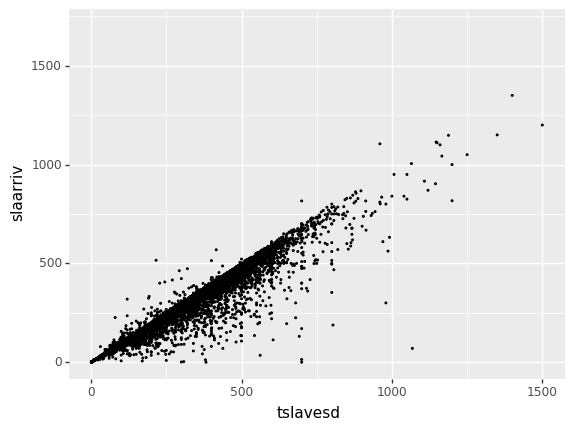

<ggplot: (8779323042653)>

In [9]:
p9.ggplot(tast) + p9.aes(x = 'tslavesd', y = 'slaarriv') + p9.geom_point(size=.2)

We can see that there is a strong linear relationship between tslavesd and slaarriv which would be consistent with a death process.  There are some outlying voyages where the slave population increase.

/home/jsharpna/anaconda3/lib/python3.7/site-packages/plotnine/layer.py:452: PlotnineWarning: geom_point : Removed 26734 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


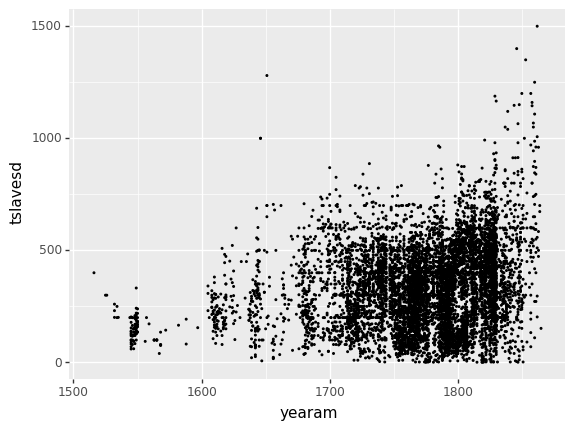

<ggplot: (8779322970865)>

In [12]:
p9.ggplot(tast) + p9.aes(x = 'yearam', y = 'tslavesd') + p9.geom_point(size=.2)

Generally we find that the slaves at departure is increasing over the years.  This trend is not strictly linear and we will see that this seems to be driven partly by the nationalities of the ships and the increase in hold size.

## The flag that the ships flew.

1. We want to understand the trends of the nationality of the slave ships (the flag that they flew under is in the national variable).  We subselect the values of `national` that have more than 100 voyages with that value.  
2. We create a DataFrame that filters out the voyages where `national` does not have one of these values.
3. We create a variable, `flag`, that is a string of easily readable names for these values by looking them up in the pdf codebook.
4. We plot the counts of the voyages by flag as a function of voyage year.

In [7]:
## Answers to 1-3

keep_nat = tast.groupby('national').size() > 100
tast_main_nats = tast[tast['national'].map(keep_nat) == True]
tast_main_nats['national'].unique()

## The only way to encode the names is by hand, the best way is with a dictionary
nat_namer = {1.: 'Spain', 4.: 'Port.', 5.: 'Brazil', 7.: 'GB', 8.: 'Neth.', 9.: 'USA', 10.: 'France', 11.: 'Denmark'}
tast_main_nats['flag'] = tast_main_nats['national'].map(nat_namer)

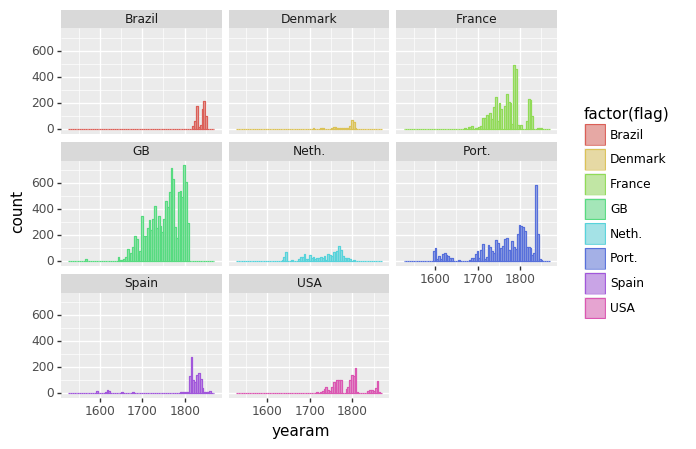

<ggplot: (-9223363303642195070)>

In [8]:
## Plotting the histogram of voyages by year with flag facet
p9.ggplot(tast_main_nats) + p9.aes(x='yearam',color='factor(flag)',fill='factor(flag)') \
+ p9.geom_histogram(alpha=.5) + p9.facet_wrap('~flag')

In [9]:
tast['flag'] = tast_main_nats['flag']
del tast_main_nats

Overall activity peaks around 1800, while the decline in slaving happens around 1830 for GB and France.  Spain and Portugal retain slaving and it seems to pick up around 1830, likely due to a drop in competition.  Great Britian's abrupt decline in slave trade reflects the 1833 Slavery Abolition Act.  

## Revolts

We create a variable that is True if there was a resistance (like a slave revolt) on the ship.  Plot the density of ships as a function of year with and without revolts and compare these distributions.

In [13]:
tast.groupby('resistance').size()

resistance
1.0    435
2.0     77
3.0     20
4.0      3
5.0      1
6.0      7
dtype: int64

In [14]:
## By looking at the codebook, we find that voyages without 
## any resistance are encoded as NAs
tast['is_res'] = ~ tast['resistance'].isna()

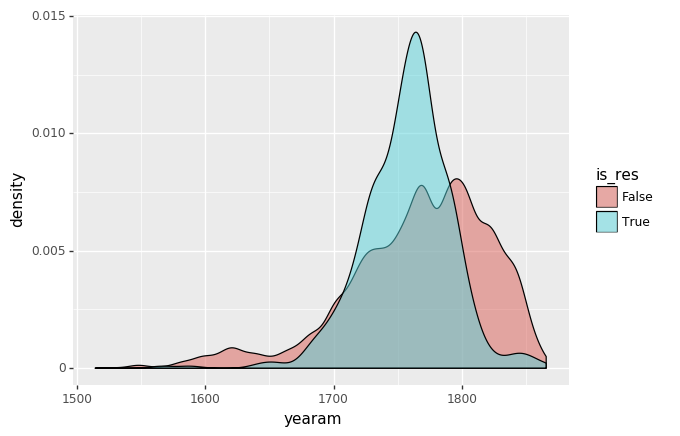

<ggplot: (8733208204797)>

In [15]:
p9.ggplot(tast) + p9.aes(x='yearam',fill='is_res') +\
p9.geom_density(alpha=.5)

In the plot above we see that the voyages with resistance is concentrated between 1700 and 1800, while the voyages without resistances are more spread with the bulk between 1700 and 1850.

## Other patterns.

1. The arrival and departure locations are quite detailed, and they are coded in a specific way.  We will abbreviate them such that
```
30000 Caribbean 36100 Martinique 36101 Fort-Royale
```
is just encoded as '3' or Caribbean.
2. We plot the trend of voyages as a function of arrival location.
3. We do the same for departure location.
4. We plot the ratio of captives that are men as a function of year.  Include a smoother to describe the over all trend.
5. We describe the geoms, aesthetic mappings, and other aspects of the plot.

When I wrote this I wanted to simplify the analysis, so I make a coarse encoding.  This encoding is too coarse for the departure location, so we need to make that encoding less coarse to be interesting.

In [17]:
pactr_dict = {1: 'Europe', 2: 'North America', 3: 'Caribbean', 4: 'Spanish Mainland America', 
 5: 'Brazil', 6: 'Africa', 8: 'Other'}

In [18]:
tast['embport'] = (tast['plac1tra'] // 100)
tast['landport'] = (tast['sla1port'] // 10000).map(pactr_dict)

In [28]:
tast['landport'].count()

24849

In [30]:
tast['yearam'].count()

34941

In [31]:
tast['flag'].

25478

In [29]:
tast.shape

(34941, 93)

In [19]:
tast.groupby('landport').size()

landport
Africa                        598
Brazil                       5370
Caribbean                   16168
Europe                         42
North America                1574
Other                         106
Spanish Mainland America      991
dtype: int64

In [ ]:
tast

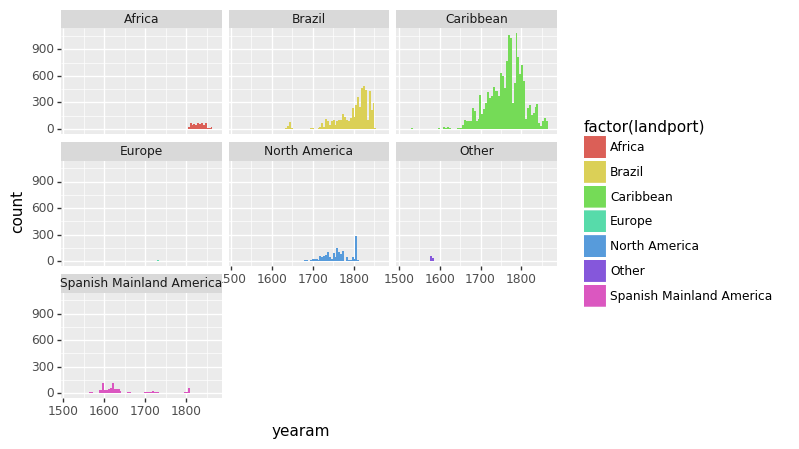

<ggplot: (8733208203745)>

In [20]:
## plotting the year histograms by landport - need to drop nas
p9.ggplot(tast.dropna(subset=['landport']), p9.aes(x='yearam',fill='factor(landport)')) \
+ p9.geom_histogram() + p9.facet_wrap('~ landport')

In [131]:
tast.groupby('embport').size()

embport
101.0       1
601.0    2121
602.0    1052
603.0     883
604.0    2515
605.0    2724
606.0    2984
607.0    7161
608.0     779
609.0     893
998.0       8
dtype: int64

We see that the Caribbean received the majority of slaves with activity peaking in the late 18th century.  Brazil's activity peaks later, after 1800.  Comparably fewer slaves disembarked in Spanish America and North America. 

In [23]:
embdict = {601: 'Senegambia & offshore Atl.',
602: 'Sierra Leone',
603: 'Windward Coast',
604: 'Gold Coast',
605: 'Bight of Benin',
606: 'Bight Biafra & Gulf Guinea isl',
607: 'W Central Afr & St Helena',
608: 'SE Africa & Indian Ocean isl',
609: 'Other Africa'}

In [24]:
tast['embname'] = tast['embport'].map(embdict)

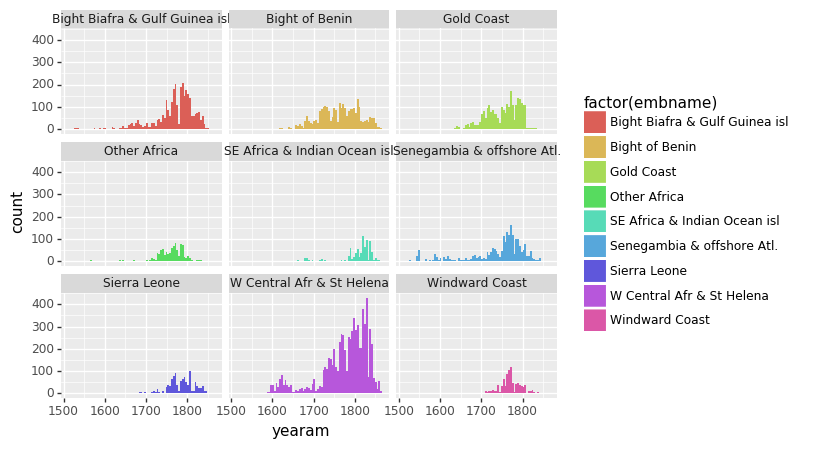

<ggplot: (8733207928163)>

In [25]:
p9.ggplot(tast.dropna(subset=['embname']), p9.aes(x='yearam',fill='factor(embname)')) \
+ p9.geom_histogram() + p9.facet_wrap('~ embname')

Earlier slaving voyages departed from locations in West Africa and the Gulf of Guinea.  Later voyages departed from central Africa and more southern locations.

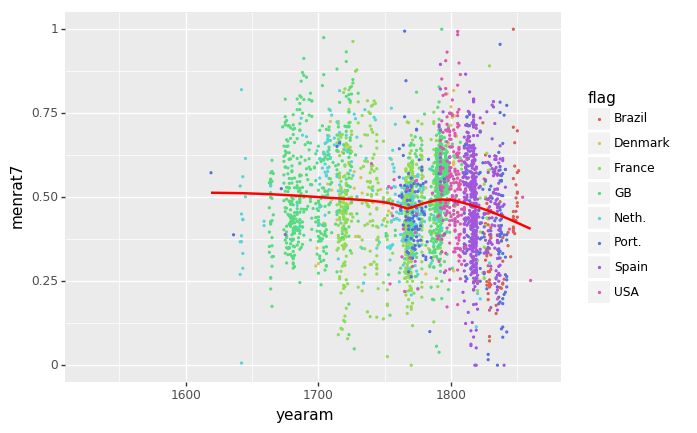

<ggplot: (-9223363251664431349)>

In [127]:
p9.ggplot(tast_main_nats) + p9.aes(x='yearam',y='menrat7',color='flag') + p9.geom_point(size=.3)\
+ p9.stat_smooth(method='lowess',color='red')

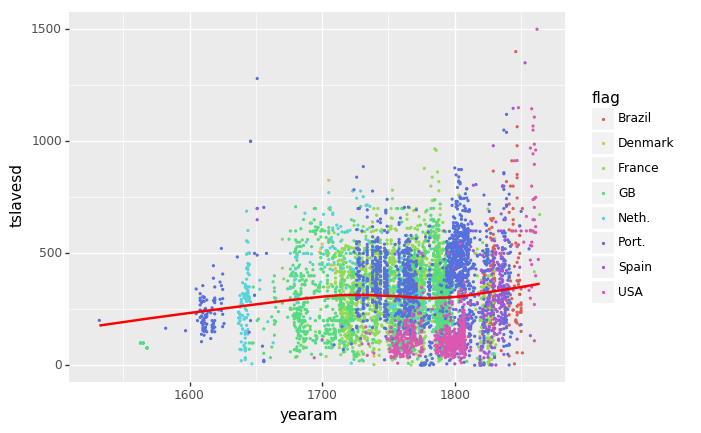

<ggplot: (-9223363303662111635)>

In [34]:
p9.ggplot(tast.dropna(subset=['flag'])) + p9.aes(x='yearam',y='tslavesd',color='flag') + p9.geom_point(size=.3)\
+ p9.stat_smooth(method='lowess',color='red')

In [35]:
tast['time_bin'] = tast['yearam'] // 50

In [37]:
tast.groupby(['flag','time_bin']).size()

flag     time_bin
Brazil   36           730
         37            58
Denmark  32             2
         33             4
         34            22
         35           129
         36            91
France   31             1
         32             2
         33            76
         34          1076
         35          2243
         36           667
         37             4
GB       31            18
         32            40
         33           904
         34          3296
         35          5542
         36          1209
Neth.    32           111
         33           202
         34           340
         35           570
         36            14
Port.    30             2
         31           112
         32           387
         33           167
         34           999
         35          1507
         36          2119
         37            10
Spain    30             3
         31            16
         32            53
         33            28
         35         